In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from sklearn import tree
from sklearn.metrics import confusion_matrix
import numpy as np
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
dataset = np.concatenate((iris.data,iris.target[:,None]),axis=1)
iris.feature_names.append('target')
df = pd.DataFrame(dataset, columns = iris.feature_names)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = 'target'),df.target,test_size=0.1)

In [5]:
model = RandomForestClassifier(n_estimators = 20,
                               min_samples_split = 4,max_depth = 10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [6]:
model.estimators_

[DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=559325720),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=1467947970),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=868405441),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=580293883),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=706097118),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=1518878604),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
                        random_state=1671100755),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4,
              

[Text(267.84000000000003, 733.86, 'X[3] <= 0.75\ngini = 0.666\nsamples = 86\nvalue = [46, 47, 42]'),
 Text(133.92000000000002, 570.78, 'gini = 0.0\nsamples = 28\nvalue = [46, 0, 0]'),
 Text(401.76000000000005, 570.78, 'X[3] <= 1.75\ngini = 0.498\nsamples = 58\nvalue = [0, 47, 42]'),
 Text(267.84000000000003, 407.70000000000005, 'X[2] <= 5.05\ngini = 0.113\nsamples = 35\nvalue = [0, 47, 3]'),
 Text(133.92000000000002, 244.62, 'gini = 0.0\nsamples = 31\nvalue = [0, 46, 0]'),
 Text(401.76000000000005, 244.62, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(267.84000000000003, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(535.6800000000001, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(535.6800000000001, 407.70000000000005, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 39]')]

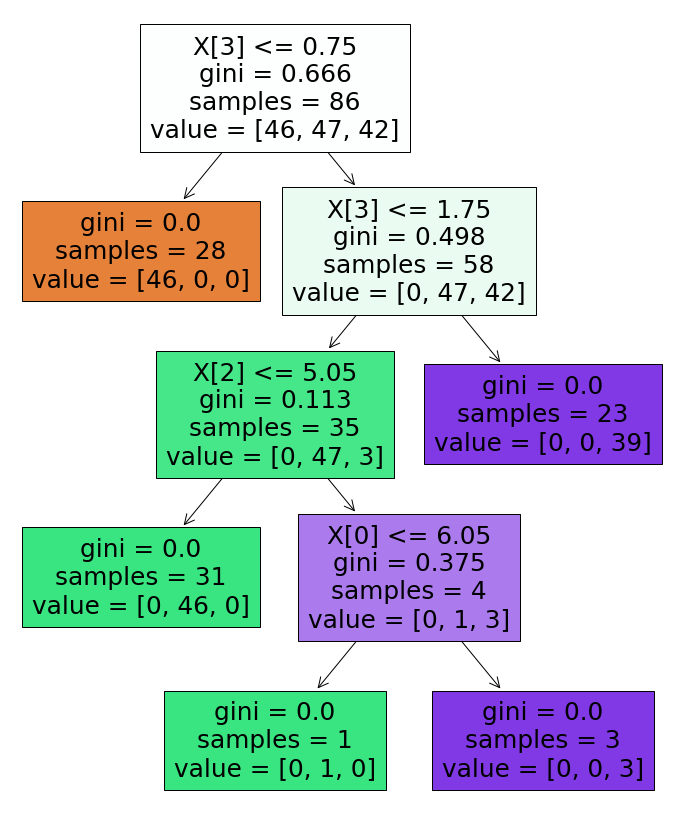

In [7]:
plt.figure(figsize=(12,15))
tree.plot_tree(model.estimators_[0],filled=True)

In [8]:
for i in range(len(model.estimators_)):
    print(tree.export_text(model.estimators_[i]))

|--- feature_3 <= 0.75
|   |--- class: 0.0
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2.0
|   |--- feature_3 >  1.75
|   |   |--- class: 2.0

|--- feature_3 <= 0.80
|   |--- class: 0.0
|--- feature_3 >  0.80
|   |--- feature_2 <= 5.05
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  4.85
|   |   |   |--- feature_3 <= 1.75
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  1.75
|   |   |   |   |--- class: 2.0
|   |--- feature_2 >  5.05
|   |   |--- class: 2.0

|--- feature_2 <= 2.45
|   |--- class: 0.0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1.0
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2.0
|   |--- feature_2 >  4.95
|   |   |--- feature_1 <

Text(33.0, 0.5, 'Truth')

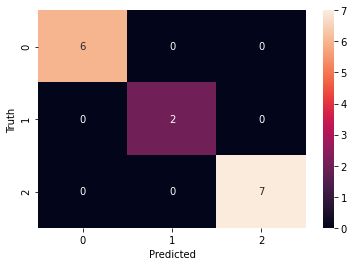

In [9]:
predicted = model.predict(x_test)
cm = confusion_matrix(predicted,y_test)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')